In [74]:
library(repr)
library(ggplot2)
library(MASS)
library(package = nnet)
options(repr.plot.width=6, repr.plobt.height=4)

Import Data

In [3]:
cereal = read.csv('cereal_dillons.csv')
head(cereal)

ID,Shelf,Cereal,size_g,sugar_g,fat_g,sodium_mg
1,1,Kellog's Razzle Dazzle Rice Crispies,28,10,0,170
2,1,Post Toasties Corn Flakes,28,2,0,270
3,1,Kellogg's Corn Flakes,28,2,0,300
4,1,Food Club Toasted Oats,32,2,2,280
5,1,Frosted Cheerios,30,13,1,210
6,1,Food Club Frosted Flakes,31,11,0,180


In [13]:
cereal[cereal$Shelf==4,]

,ID,Shelf,Cereal,size_g,sugar_g,fat_g,sodium_mg
31,31,4,Total Raisin Bran,55,19,1.0,240
32,32,4,Food Club Wheat Crunch,60,6,0.0,300
33,33,4,Oatmeal Crisp Raisin,55,19,2.0,220
34,34,4,Food Club Bran Flakes,31,5,0.5,220
35,35,4,Cookie Crisp,30,12,1.0,180
36,36,4,Kellogg's All Bran Original,31,6,1.0,65
37,37,4,Food Club Low Fat Granola,55,14,3.0,100
38,38,4,Oatmeal Crisp Apple Cinnamon,55,19,2.0,260
39,39,4,"Post Fruit and Fiber - Dates, Raisons, Walnuts",55,17,3.0,280
40,40,4,Total Corn Flakes,30,3,0.0,200


### Question 12
In order to maximize sales, items within grocery stores are strategically placed to
draw customer attention. This exercise examines one type of item—breakfast cereal.
Typically, in large grocery stores, boxes of cereal are placed on sets of shelves located
on one side of the aisle. By placing particular boxes of cereals on specific shelves,
grocery stores may better attract customers to them. To investigate this further, a
random sample of size 10 was taken from each of four shelves at a Dillons grocery store
in Manhattan, KS. These data are given in the cereal_dillons.csv file. The response
variable is the shelf number, which is numbered from bottom (1) to top (4), and the
explanatory variables are the sugar, fat, and sodium content of the cereals. Using
these data, complete the following:

#### (a)

In [4]:
stand01 <- function(x) { (x - min(x))/(max(x) - min(x)) }
cereal2 <- data.frame(Shelf = cereal$Shelf , sugar = stand01(x = cereal$sugar_g/cereal$size_g), 
                                             fat = stand01(x = cereal$fat_g/cereal$size_g), 
                                             sodium = stand01(x = cereal$sodium_mg/cereal$size_g))

#### (b)

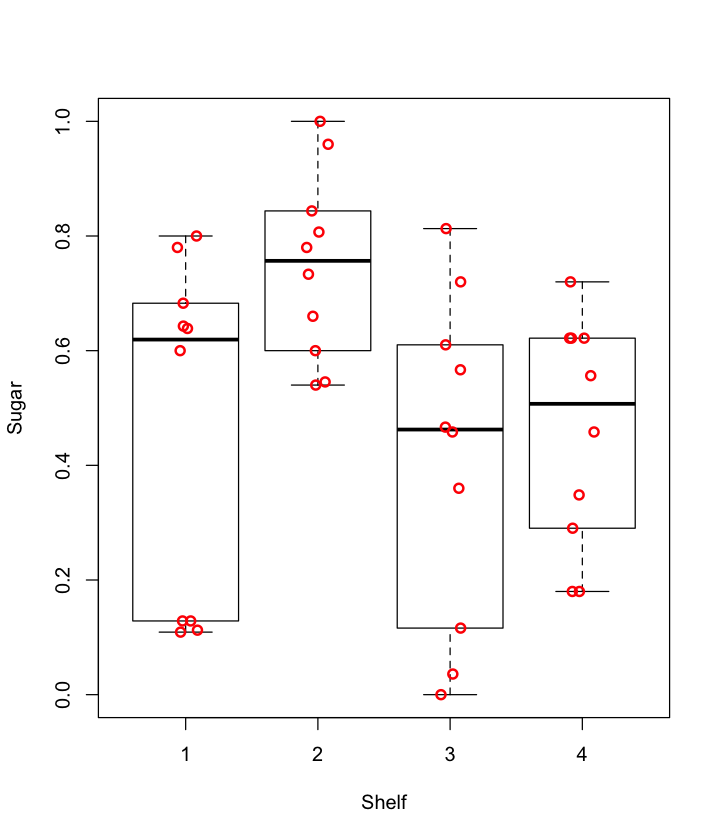

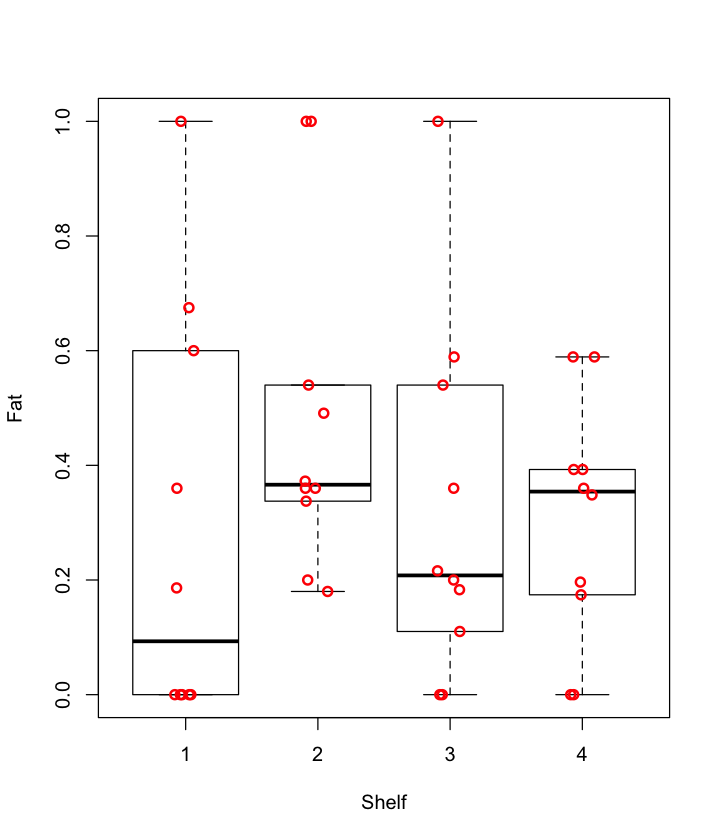

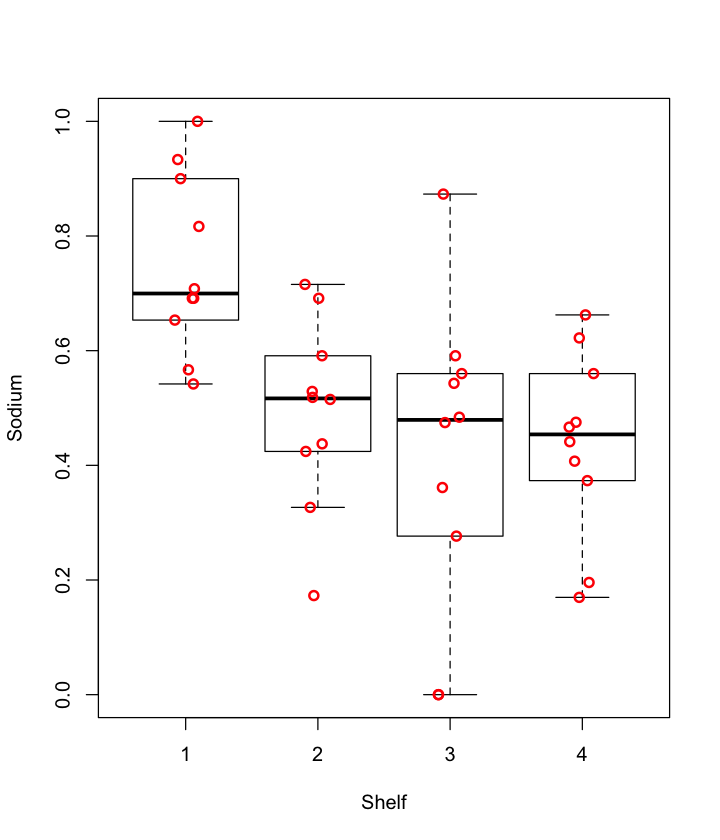

In [5]:
boxplot(formula = sugar ~ Shelf , data = cereal2 , ylab = "Sugar", xlab = "Shelf", pars = list(outpch=NA))
stripchart(x = cereal2$sugar ~ cereal2$Shelf , lwd = 2, col = "red", method = "jitter", vertical = TRUE, pch = 1,
           add = TRUE)

boxplot(formula = fat ~ Shelf , data = cereal2 , ylab = "Fat", xlab = "Shelf", pars = list(outpch=NA))
stripchart(x = cereal2$fat ~ cereal2$Shelf , lwd = 2, col = "red", method = "jitter", vertical = TRUE, pch = 1,
           add = TRUE)

boxplot(formula = sodium ~ Shelf , data = cereal2 , ylab = "Sodium", xlab = "Shelf", pars = list(outpch=NA))
stripchart(x = cereal2$sodium ~ cereal2$Shelf , lwd = 2, col = "red", method = "jitter", vertical = TRUE, pch = 1,
           add = TRUE)

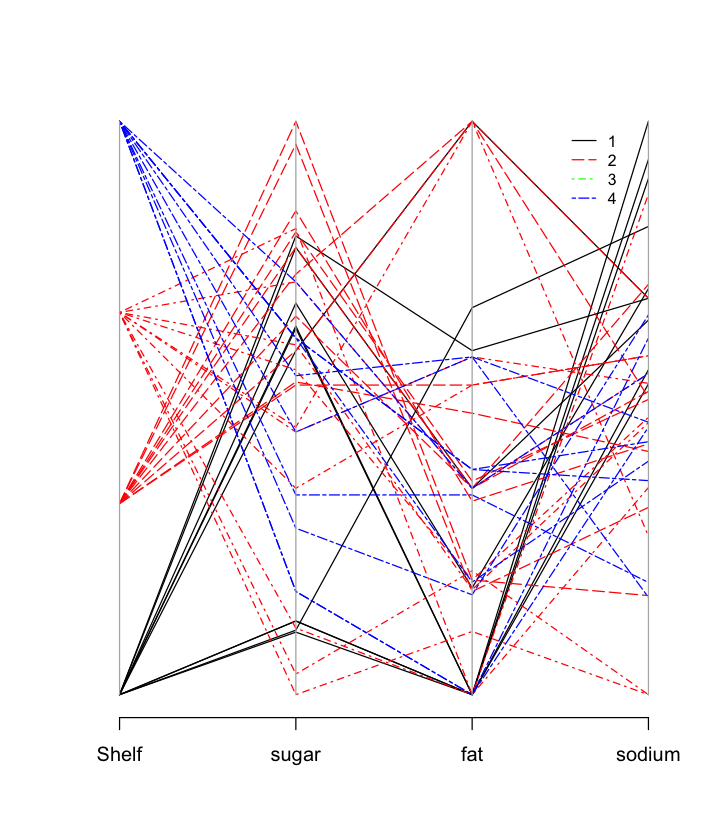

In [11]:
cereal2.colors<-ifelse(test = cereal2$Shelf==1, yes = "black", 
                    no = ifelse(test = cereal2$Shelf==2, yes = "red",
                                ifelse(test = cereal2$Shelf==3, yes = "red", no = "blue")))

cereal2.lty<-ifelse(test = cereal2$Shelf==1, yes = "solid", 
                    no = ifelse(test = cereal2$Shelf==2, yes = "longdash",
                                ifelse(test = cereal2$Shelf==3, yes = "dotdash", no = "twodash")))

parcoord(x = cereal2, col = cereal2.colors, lty = cereal2.lty)  # Plot
legend(x = 3.5, y = 1, legend = c("1", "2", "3", "4"), lty = c("solid", "longdash", "dotdash", "twodash"),
      col=c("black", "red", "green", "blue"), cex=0.8, bty="n")


There appears to be some content difference clustered by shelves. As the above parallel coordinates plot shows, Shelf 4 Cereals appear to have the lowest Sugar, Fat and Sodium content -- which suggest this shelf contains "healthier" types of cereals. Shelf 3 appears to have the highest Sugar content and perhaps the least "healthiest" cereals.

#### (c)

The response has values of 1, 2, 3, and 4. Under what setting would it be desirable
to take into account ordinality. Do you think this occurs here?

If the ordering of the shelves had an influence on the visibility to the customers, then it would be desirable to take into account ordinality since there would be a natural ordering to the location of the cereal. For example, if a cereal was located on the top or bottom shelves compared to the middle shelves, where there would be more visible to the customers, then there would be an oridinality to the shelf variable.

#### (d)

In [16]:
library(package = MASS)
mod.fit.ord <- polr(formula = as.factor(Shelf) ~ sugar + fat + sodium, data = cereal2, method = "logistic")
summary(mod.fit.ord)
library(package = car)
Anova(mod.fit.ord)


Re-fitting to get Hessian



Call:
polr(formula = as.factor(Shelf) ~ sugar + fat + sodium, data = cereal2, 
    method = "logistic")

Coefficients:
          Value Std. Error  t value
sugar  -1.61101     1.2830 -1.25565
fat    -0.05123     0.9657 -0.05305
sodium -4.85950     1.6302 -2.98094

Intercepts:
    Value   Std. Error t value
1|2 -4.7534  1.4837    -3.2037
2|3 -3.3435  1.3810    -2.4210
3|4 -1.9823  1.2867    -1.5407

Residual Deviance: 98.52912 
AIC: 110.5291 

ERROR: Error in library(package = car): there is no package called ‘car’


#### (g) Construct a plot similar to Figure 3.3 where the estimated probability for a shelf is on the y-axis and the sugar content is on the x-axis. Use the mean overall fat and sodium content as the corresponding variable values in the model. Interpret the plot with respect to sugar content.

In [102]:
mod.fit.sugar<-polr(formula = as.factor(Shelf) ~ sugar + sodium + fat, data = cereal2, method = "logistic")
summary(mod.fit.sugar)
beta.hat<-c(-mod.fit.ord$coefficients, mod.fit.ord$zeta)


Re-fitting to get Hessian



Call:
polr(formula = as.factor(Shelf) ~ sugar + sodium + fat, data = cereal2, 
    method = "logistic")

Coefficients:
          Value Std. Error  t value
sugar  -1.61101     1.2830 -1.25565
sodium -4.85950     1.6302 -2.98094
fat    -0.05123     0.9657 -0.05305

Intercepts:
    Value   Std. Error t value
1|2 -4.7534  1.4837    -3.2037
2|3 -3.3435  1.3810    -2.4210
3|4 -1.9823  1.2867    -1.5407

Residual Deviance: 98.52912 
AIC: 110.5291 

In [101]:
coefficients(mod.fit.nom.sugar)

,(Intercept),sugar
2,-4.77496346,7.56100551
3,0.32695579,-0.74496920
4,0.01817729,-0.03944922


In [107]:
beta.hat

sugar        fat     sodium        1|2        2|3        3|4 
 1.6110083  0.0512318  4.8595020 -4.7533894 -3.3434942 -1.9823125

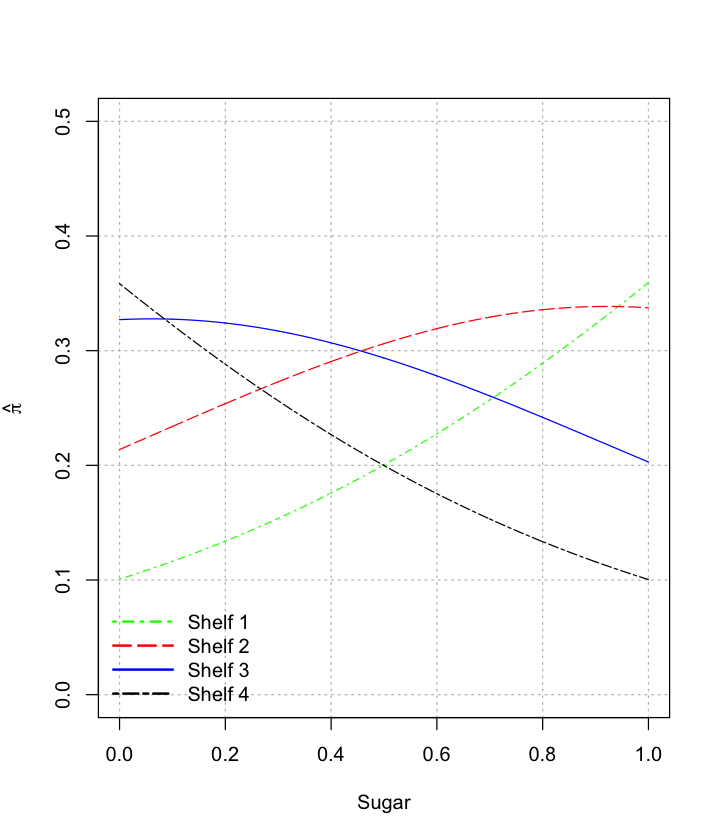

In [110]:
curve( 1/(1 + exp(beta.hat[3] + beta.hat[1]*x) + exp(beta.hat[4] + beta.hat[1]*x)),
      ylab = expression(hat(pi)), xlab = "Sugar",
      ylim = c(0,0.5),
      xlim = c(min(cereal2$sugar), max(cereal2$sugar)), 
      col = "black", lty = "solid", lwd = 2, n = 1000, type = "n",
      panel.first = grid(col = "gray", lty = "dotted"))

curve(expr = plogis(q = mod.fit.sugar$zeta[1] - mod.fit.sugar$coefficients[1]*x 
                    - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                    - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)), col = "green",
      type = "l",
      add = TRUE, lty = "dotdash", n = 1000)  # Shelf 1


curve(expr = plogis(q = mod.fit.sugar$zeta[2] - mod.fit.sugar$coefficients[1]*x
                        - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                        - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)) 
          - plogis(q = mod.fit.sugar$zeta[1] - mod.fit.sugar$coefficients[1]*x 
                    - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                    - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)), col = "red",
     type = "l",
     add = TRUE, lty = "longdash", n = 1000)  # Shelf 2


curve(expr = plogis(q = mod.fit.sugar$zeta[3] - mod.fit.sugar$coefficients[1]*x
                        - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                        - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)) 
          - plogis(q = mod.fit.sugar$zeta[2] - mod.fit.sugar$coefficients[1]*x 
                    - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                    - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)), col = "blue",
     type = "l",
     add = TRUE, lty = "solid", n = 1000)  # Shelf 3


curve(expr = 1 - plogis(q=mod.fit.sugar$zeta[3]- mod.fit.sugar$coefficients[1]*x
                        - mod.fit.sugar$coefficients[2]*mean(cereal2$sodium)
                        - mod.fit.sugar$coefficients[3]*mean(cereal2$fat)),
     col='black',
     type="l", add = TRUE, lty = "twodash", n = 1000)

 legend(x = 'bottomleft', legend=c("Shelf 1", "Shelf 2", "Shelf 3", "Shelf 4"), 
        lty=c("dotdash","longdash","solid", "twodash"),
       col=c("green","red","blue", "black"), bty="n", lwd = c(2,2,2,2), seg.len = 4)